# Importing Basic Libraries

In [1]:
import datetime
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
%matplotlib inline

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter ( 'ignore' )

## Loading Data And Exploration

In [2]:
# Loading data using pandas library
df = pd.read_csv("air_polution_data.csv")

# Printing first 5 rows of data
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
# Printing shape of data
df.shape

(43824, 13)

We can see dataset has **43824** rows and **13** columns in it.

In [4]:
# Checking info of data including datatypes, non null values, size of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [5]:
# Printing statistical properties of data
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [6]:
# Printing the name of columns
print("Dataset has following columns...")
for i, j in enumerate(df.columns):
    print(f" {i+1}) {j}")

Dataset has following columns...
 1) No
 2) year
 3) month
 4) day
 5) hour
 6) pm2.5
 7) DEWP
 8) TEMP
 9) PRES
 10) cbwd
 11) Iws
 12) Is
 13) Ir


# Data Preprocessing

In [7]:
# lets try to check the percentage of missing values,unique values,percentage of one catagory values and type against each column.
def statistics(df):
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum(), df[col].isnull().sum() * 100 / df.shape[0], df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Missing values', 'Percentage of Missing Values', 'Data Type'])
    stats_df.set_index('Feature', drop=True, inplace=True)
    stats_df.drop(stats_df[stats_df['Missing values'] == 0].index, axis=0, inplace=True)
    stats_df.sort_values('Percentage of Missing Values', ascending=False, inplace=True)
    return stats_df

Here I made a function that will take a dataframe and then it will iterate it column by column. During each iteration it is calculating Unique, Mising, Percentage of missing, and data type of each column and appending it inot a list that is converted inot data frmae at the end.

In [8]:
statistics(df)

,Unique_values,Missing values,Percentage of Missing Values,Data Type
Feature,,,,
pm2.5,581,2067,4.716594,float64


Here we can see that there **4.7%** null values are present in one column **pm2.5** of dataset.

Let's handle these null values.

In [9]:
# First 24 rows have pm2.5 values are none so we'll just discard them and remaining will be filled with forward filling
df = df[24:].fillna(method='ffill')
df['pm2.5'].isna().sum()

0

Now we can see there are no null values in **pm2.5** column.

In [10]:
# Combining year, month, day into single column date
df['time'] = df.apply(lambda x : datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']), axis=1)

# Dropping original separate data features
df.drop(columns=['year', 'month', 'day', 'hour', 'No'], inplace=True)

# Setting date as index of dataset
df = df.set_index('time')
df.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
time,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [11]:
# Let's check unique values in cbwd column
df['cbwd'].unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

We have a categorical variable and it has to convert into integr because models only work with numerical data so to convert it inot integers i used One Hot Encoding .

In [12]:
# let's perform one-hot encoding cbwd column
df = df.join(pd.get_dummies(df['cbwd']))

# Deleting original cbwd column
del df['cbwd']
df.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
time,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


Here I will plot the PM2.5 and temperature feature to get the trends and it's distribution with respect to time.

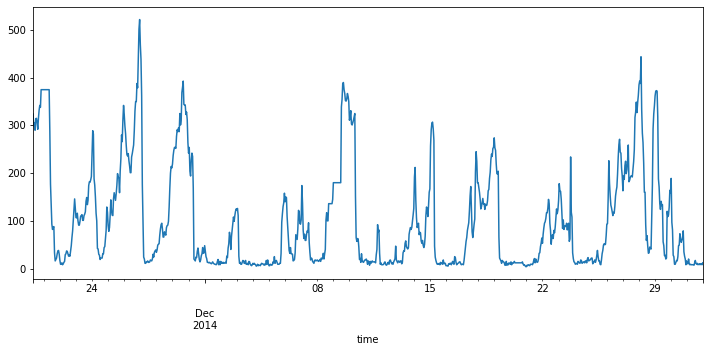

In [13]:
# Let''s plot pm2.5 to see it's trends
plt.figure(figsize=(12, 5))
df['pm2.5'][-1000:].plot()
plt.show()

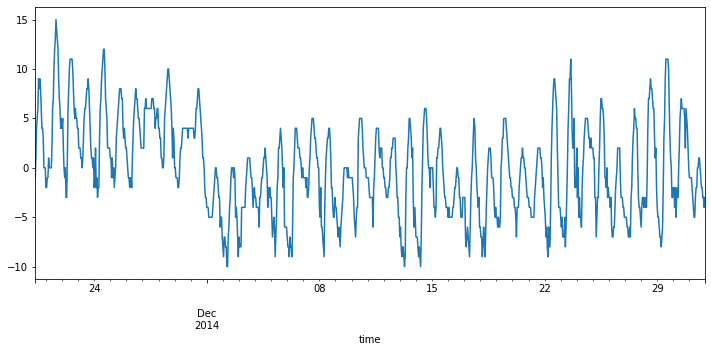

In [14]:
# Let''s plot TEMP to see it's trends
plt.figure(figsize=(12, 5))
df['TEMP'][-1000:].plot()
plt.show()

## Determine Parameters

In [15]:
# Let's determine the parameters
seq_len = 5*24 # observe the data for the past 5 days
delay = 1*24 # predict the PM2.5 value one day after

# taking out data according to determined parameters
df_ = np.array([df.iloc[i : i + seq_len + delay].values for i in range(len(df) - seq_len - delay)])
df_.shape

(43656, 144, 11)

In [16]:
# Spliting data into x, and y variable
np.random.shuffle(df_)
x = df_[:, :5*24, :]
y = df_[:, -1, 0]

# Printing shape of x and y variable
x.shape, y.shape

((43656, 120, 11), (43656,))

In [17]:
# printing x variable
x

array([[[149.,  -7.,  -1., ...,   1.,   0.,   0.],
        [100.,  -6.,   0., ...,   1.,   0.,   0.],
        [ 83.,  -8.,   2., ...,   1.,   0.,   0.],
        ...,
        [ 11., -27.,   0., ...,   1.,   0.,   0.],
        [  9., -24.,   0., ...,   1.,   0.,   0.],
        [  9., -22.,  -3., ...,   0.,   0.,   0.]],

       [[264., -15.,  -5., ...,   0.,   1.,   0.],
        [324., -16.,  -3., ...,   0.,   1.,   0.],
        [344., -16.,  -6., ...,   1.,   0.,   0.],
        ...,
        [ 15., -27.,   7., ...,   1.,   0.,   0.],
        [ 11., -28.,   5., ...,   1.,   0.,   0.],
        [ 10., -28.,   4., ...,   1.,   0.,   0.]],

       [[ 27., -16.,  -2., ...,   0.,   0.,   0.],
        [ 21., -16.,  -2., ...,   0.,   0.,   0.],
        [  9., -17.,  -3., ...,   0.,   0.,   0.],
        ...,
        [  8., -24.,  -3., ...,   1.,   0.,   0.],
        [  5., -24.,  -5., ...,   1.,   0.,   0.],
        [  8., -26.,  -7., ...,   1.,   0.,   0.]],

       ...,

       [[ 87.,  18.,  25

In [18]:
# printing y variable
y

array([ 97.,  74.,  24., ..., 196.,  23.,  59.])

## Spliting and Normalizing Data

In [19]:
# Spliting data into train and test part
split = int(y.shape[0]*0.8)
train_x = x[:split]
train_y = y[:split]
test_x = x[split:]
test_y = y[split:]

Slitted the data into 80, 20 ratio


In [20]:
# Normalizing data with Standard Scaler Technique
mean = train_x.mean(axis=0)
std = train_x.std(axis=0)
train_x = (train_x - mean) / std
test_x = (test_x - mean) / std # Use the mean & std of train.

Here I have normalized data using Standard Sclaer technique. I can also get this technique from sklearn library but that one is ony for 2D data but here we have converted data into 3D so that's why I'm doing it manually.

In [21]:
def evaluate_model(model):
    # importing metrices to evaluate the model
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
    test_predict = model.predict(test_x)
    
    # Evaluating model
    print("R2  :", round(r2_score(test_y, test_predict), 2))
    print("MAE :", round(mean_absolute_error(test_y, test_predict), 2))
    print("MSE :", round(mean_squared_error(test_y, test_predict), 2))

## Building LSTM

In [22]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [23]:
loss = 'mae'
optimizer = 'adam'
metric = ["mse"]

def build_model():
    # Creating LSTM Model with multiple hidden layers to go deep down
    model = keras.Sequential()
    model.add(layers.LSTM(32, input_shape=(120, 11), return_sequences=True)) 
    model.add(layers.LSTM(32, return_sequences=True)) 
    model.add(layers.LSTM(32)) 
    model.add(layers.Dense(1))
    model.compile(optimizer=optimizer, loss=loss, metrics=metric)
    return model

Here I built a medium level LSTM model. This LSTM model has 4 layers.
- First LSTM layer as input layer with 32 neurons.
- Second and third LSTM layer as hidden layers with 32 neurons each.
- 4th last Dense layer as output layer with 1 neuron

In [24]:
model = KerasClassifier(build_fn=build_model)
params = dict(batch_size=[2, 3, 6], epochs=[128, 256, 400])
grid = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=1)
# grid.fit(train_x, train_y)
# grid.best_params_

In [25]:
# Creating final model
model = build_model()

# Setting call back
lr_reduced = keras.callbacks.ReduceLROnPlateau('val_loss', patience=3, factor=0.5, min_lr=0.00001)

In [26]:
# Tuning Final model
history = model.fit(train_x, train_y, batch_size=128, epochs=150, validation_data=(test_x, test_y), callbacks=[lr_reduced])

Epoch 1/150
273/273 [==============================] - 60s 204ms/step - loss: 89.0665 - mse: 16316.5186 - val_loss: 82.2469 - val_mse: 14646.4326
Epoch 2/150
273/273 [==============================] - 57s 211ms/step - loss: 81.4169 - mse: 14695.5713 - val_loss: 77.0405 - val_mse: 13425.0791
Epoch 3/150
273/273 [==============================] - 55s 202ms/step - loss: 77.0068 - mse: 13582.4336 - val_loss: 73.3753 - val_mse: 12449.3887
Epoch 4/150
273/273 [==============================] - 54s 197ms/step - loss: 73.7373 - mse: 12661.0264 - val_loss: 70.5675 - val_mse: 11634.8076
Epoch 5/150
273/273 [==============================] - 58s 213ms/step - loss: 71.2273 - mse: 11890.8174 - val_loss: 68.4696 - val_mse: 10959.0303
Epoch 6/150
273/273 [==============================] - 53s 195ms/step - loss: 69.3606 - mse: 11259.3154 - val_loss: 66.9800 - val_mse: 10414.7773
Epoch 7/150
273/273 [==============================] - 53s 194ms/step - loss: 68.0221 - mse: 10748.1895 - val_loss: 65.9687 

Here I have comiled and fit the model for 150 epochs using the defined learning rate.

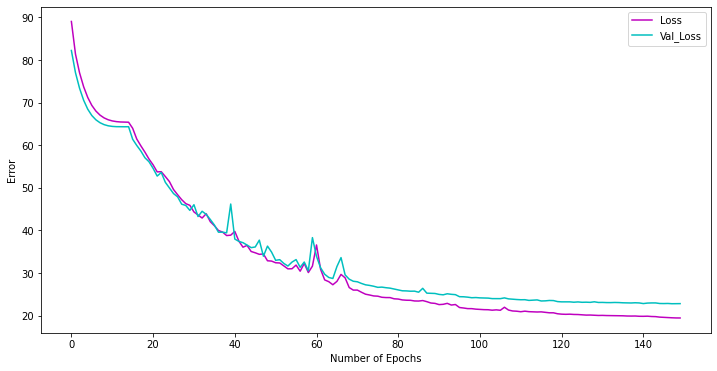

In [27]:
# Plotting Error of model
plt.figure(figsize=(12, 6))
plt.plot(history.epoch, history.history['loss'], c='m', label="Loss")
plt.plot(history.epoch, history.history['val_loss'], c='c', label="Val_Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

In [28]:
evaluate_model(model)

R2  : 0.79
MAE : 22.8
MSE : 1722.94
